In [2]:
# Import library
import glob

# files are contained in this folder
carpeta = "Downloads/ENGLISH/**/**/**/"

# List all the .txt files and sort them alphabetically
arxius = glob.glob(carpeta + '*.txt')
arxius.sort()
arxius

['Downloads/ENGLISH\\UNv1.0-TEI\\en\\1998\\bla.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2002\\test_gva_duty_001.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2002\\test_scanning.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2004\\test_bangkok2.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2004\\test_bangkok3.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2008\\ceb.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2008\\doha_journal_no__2.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2008\\doha_journal_no__3.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2008\\doha_journal_no__4.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2008\\doha_journal_no__5.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2011\\istanbul_journal_no__1.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2011\\istanbul_journal_no__2.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2011\\istanbul_journal_no__3.xml.txt',
 'Downloads/ENGLISH\\UNv1.0-TEI\\en\\2011\\istanbul_journal_no__6.xml.txt',
 'Downloads/ENGLISH\\U

In [3]:
len(arxius)

38

In [5]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titols = []

for n in arxius:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    data = re.sub('[\W_]+', ' ', f.read())
    # Store the texts and titles of the books in two separate lists
    titols.append(os.path.basename(n).replace('.txt', ''))
    txts.append(data)

# Print the length, in characters, of each article
[len(t) for t in txts]

[4930,
 10764,
 34397,
 10764,
 510,
 49166,
 19791,
 27567,
 24432,
 14724,
 9617,
 22139,
 30421,
 14390,
 9499,
 14889,
 17284,
 13105,
 27774,
 44127,
 30023,
 9865,
 13341,
 16909,
 20900,
 10237,
 7372,
 9506,
 9434,
 8896,
 8414,
 9811,
 15900,
 8410,
 16565,
 23279,
 24137,
 20719]

In [6]:
titols

['bla.xml',
 'test_gva_duty_001.xml',
 'test_scanning.xml',
 'test_bangkok2.xml',
 'test_bangkok3.xml',
 'ceb.xml',
 'doha_journal_no__2.xml',
 'doha_journal_no__3.xml',
 'doha_journal_no__4.xml',
 'doha_journal_no__5.xml',
 'istanbul_journal_no__1.xml',
 'istanbul_journal_no__2.xml',
 'istanbul_journal_no__3.xml',
 'istanbul_journal_no__6.xml',
 'rio_journal_no__1.xml',
 'rio_journal_no__2.xml',
 'rio_journal_no__3.xml',
 'rio_journal_no__4.xml',
 'rio_journal_no__5.xml',
 'rio_journal_no__6.xml',
 'rio_journal_no__7.xml',
 'istanbul_journal_no__10___unff10.xml',
 'istanbul_journal_no__1___unff10.xml',
 'istanbul_journal_no__2___unff10.xml',
 'istanbul_journal_no__3___unff10.xml',
 'istanbul_journal_no__4___unff10.xml',
 'istanbul_journal_no__5___unff10.xml',
 'istanbul_journal_no__6___unff10.xml',
 'istanbul_journal_no__7___unff10.xml',
 'istanbul_journal_no__8___unff10.xml',
 'istanbul_journal_no__9___unff10.xml',
 'lldc_2014_journal_no__1.xml',
 'lldc_2014_journal_no__2.xml',
 'lld

In [7]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in txts]

# Transform the text into tokens 
txts_split = [txt.split() for txt in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

In [10]:
for i in range(len(titols)):
  
    if titols[i] == 'istanbul_journal_no__1.xml':
        exemple = i
        break

# Print the stored index
exemple

10

In [11]:
texts[exemple][: 20]

['programme',
 'meetings',
 'sunday',
 '8',
 '2011',
 'inter',
 'parliamentary',
 'union',
 'parliamentary',
 'forum',
 'lütfi',
 'kirdar',
 'convention',
 'exhibition',
 'centre',
 '9',
 '30',
 'm',
 '12',
 '30']

In [12]:
import nltk
from nltk.stem.snowball import SnowballStemmer
import pickle

In [13]:
stemmer = SnowballStemmer(language='english')

texts_stem = [[stemmer.stem(token) for token in text] for text in texts]

# Save to pickle file
pickle.dump( texts_stem, open( 'texts_stem1.p', "wb" ) )

In [15]:
texts_stemu = pickle.load(open('texts_stem1.p', 'rb'))
texts_stemu[exemple][: 20]


['programm',
 'meet',
 'sunday',
 '8',
 '2011',
 'inter',
 'parliamentari',
 'union',
 'parliamentari',
 'forum',
 'lütfi',
 'kirdar',
 'convent',
 'exhibit',
 'centr',
 '9',
 '30',
 'm',
 '12',
 '30']

In [16]:
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stemu)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(txt) for txt in texts_stemu]

# Print the first five elements of the On the Origin of species' BoW model
bows[exemple][: 5]

C:\Users\AlexVaqueroRamirez\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(0, 13), (1, 2), (2, 2), (4, 4), (5, 1)]

In [17]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_exemple = pd.DataFrame(bows[exemple])
# Add the column names to the DataFrame
df_bow_exemple.columns = ['index', 'occurrences']

# Add a column containing the token corresponding to the dictionary index
df_bow_exemple['token'] = df_bow_exemple['index'].apply(lambda x: dictionary[x])

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_exemple = df_bow_exemple.sort_values('occurrences', ascending=False)
df_bow_exemple.head(10)

,index,occurrences,token
28,71,22,confer
54,140,21,m
106,362,20,develop
60,155,19,on
58,146,18,nation
66,163,17,p
88,217,17,unit
23,59,16,by
89,223,15,will
63,160,15,organ


In [18]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "On the Origin of Species"
model[bows[exemple]]

[(0, 0.020230492906982374),
 (1, 0.003112383524151134),
 (2, 0.007705407194622284),
 (4, 0.006224767048302268),
 (5, 0.002669630707954916),
 (7, 0.013348153539774582),
 (15, 0.01556191762075567),
 (19, 0.009337150572453403),
 (20, 0.014005725858680105),
 (21, 0.0046685752862267015),
 (23, 0.006314169009285468),
 (24, 0.029365937787504078),
 (25, 0.005778737805332001),
 (28, 0.008418892012380623),
 (29, 0.008418892012380623),
 (37, 0.018895163834361354),
 (40, 0.012933845674614903),
 (41, 0.003852703597311142),
 (47, 0.0025232165692030484),
 (49, 0.005551076452246706),
 (50, 0.003852703597311142),
 (54, 0.01926351798655571),
 (58, 0.03643740862925067),
 (60, 0.00792325683316046),
 (67, 0.0005046433138406097),
 (68, 0.007181083168881517),
 (70, 0.02029750919791087),
 (71, 0.03423621876566248),
 (72, 0.02029750919791087),
 (75, 0.023116221583866853),
 (85, 0.014733061021666091),
 (87, 0.004209446006190312),
 (89, 0.017892742023807265),
 (91, 0.08502062013491822),
 (93, 0.00706500639376853

In [19]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[exemple]])

# Name the columns of the DataFrame id and score
df_tfidf.columns = ['id', 'score']

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf = df_tfidf.sort_values('score', ascending=False)
df_tfidf.head(10)

,id,score,token
52,140,0.343735,m
410,2974,0.288270,ldcs
63,163,0.278262,p
369,2933,0.213006,2011
370,2934,0.170405,219
407,2971,0.170056,kirdar
425,2989,0.151161,rume
413,2977,0.151161,lütfi
381,2945,0.144135,congress
365,2668,0.139714,commod


In [21]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titols
sim_df.index = titols

# Print the resulting matrix
sim_df

,bla.xml,test_gva_duty_001.xml,test_scanning.xml,test_bangkok2.xml,test_bangkok3.xml,ceb.xml,doha_journal_no__2.xml,doha_journal_no__3.xml,doha_journal_no__4.xml,doha_journal_no__5.xml,...,istanbul_journal_no__7___unff10.xml,istanbul_journal_no__8___unff10.xml,istanbul_journal_no__9___unff10.xml,lldc_2014_journal_no__1.xml,lldc_2014_journal_no__2.xml,lldc_2014_journal_no__3.xml,sids_2014_journal_no__1.xml,sids_2014_journal_no__2.xml,sids_2014_journal_no__3.xml,sids_2014_journal_no__4.xml
bla.xml,1.000000,0.011129,0.050005,0.011129,0.011720,0.021912,0.043966,0.043547,0.035512,0.013802,...,0.009028,0.011619,0.013763,0.016082,0.014086,0.013358,0.005506,0.006857,0.004347,0.005131
test_gva_duty_001.xml,0.011129,1.000001,0.027877,1.000001,0.019988,0.121590,0.012748,0.022062,0.015279,0.014104,...,0.013228,0.010479,0.008314,0.015645,0.018247,0.017241,0.023375,0.022116,0.033024,0.024870
test_scanning.xml,0.050005,0.027877,1.000002,0.027877,0.058058,0.080511,0.113047,0.119906,0.094225,0.065504,...,0.053079,0.048932,0.051526,0.049992,0.055466,0.054101,0.036469,0.046020,0.048557,0.046150
test_bangkok2.xml,0.011129,1.000001,0.027877,1.000001,0.019988,0.121590,0.012748,0.022062,0.015279,0.014104,...,0.013228,0.010479,0.008314,0.015645,0.018247,0.017241,0.023375,0.022116,0.033024,0.024870
test_bangkok3.xml,0.011720,0.019988,0.058058,0.019988,1.000000,0.022649,0.030609,0.031357,0.025444,0.013327,...,0.012065,0.009675,0.008353,0.014586,0.015080,0.009526,0.036737,0.056832,0.048524,0.045507
ceb.xml,0.021912,0.121590,0.080511,0.121590,0.022649,1.000000,0.095900,0.122200,0.099283,0.067165,...,0.042629,0.043141,0.041111,0.053007,0.063217,0.055167,0.057793,0.076640,0.085002,0.080661
doha_journal_no__2.xml,0.043966,0.012748,0.113047,0.012748,0.030609,0.095900,1.000000,0.852273,0.596072,0.372131,...,0.030567,0.027899,0.021717,0.198018,0.205372,0.126781,0.184936,0.193414,0.133381,0.144332
doha_journal_no__3.xml,0.043547,0.022062,0.119906,0.022062,0.031357,0.122200,0.852273,1.000000,0.761441,0.513087,...,0.037643,0.032111,0.025326,0.146598,0.151975,0.110305,0.115212,0.144923,0.108819,0.102275
doha_journal_no__4.xml,0.035512,0.015279,0.094225,0.015279,0.025444,0.099283,0.596072,0.761441,1.000000,0.709036,...,0.034721,0.032337,0.023370,0.098899,0.093546,0.088506,0.073733,0.089365,0.100575,0.078163
doha_journal_no__5.xml,0.013802,0.014104,0.065504,0.014104,0.013327,0.067165,0.372131,0.513087,0.709036,1.000000,...,0.028989,0.029630,0.022216,0.057734,0.064642,0.063310,0.070222,0.083785,0.098768,0.086451


Text(0.5, 1.0, 'Similarity')

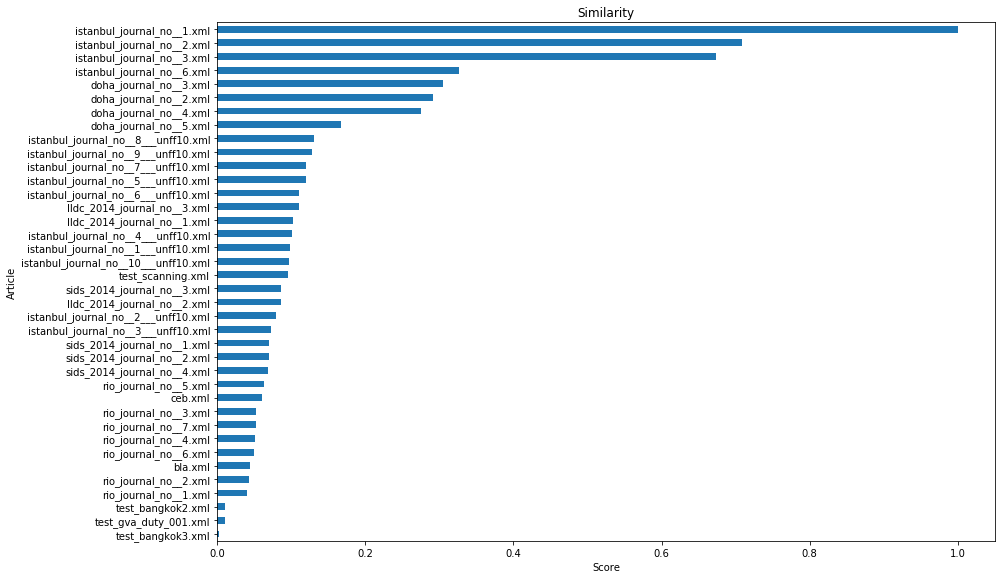

In [27]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['istanbul_journal_no__1.xml']

# Sort by ascending scores
v_sorted = v.sort_values()

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for a better readability
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.9, top=1.9, wspace=-1.6, hspace=1.8)
plt.xlabel("Score")
plt.ylabel("Article")
plt.title("Similarity")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [45.0, 45.0, 76.25, 76.25],
  [35.0, 35.0, 60.625, 60.625],
  [12.5, 12.5, 47.8125, 47.8125],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [140.0, 140.0, 162.5, 162.5],
  [112.5, 112.5, 151.25, 151.25],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [190.0, 190.0, 220.0, 220.0],
  [131.875, 131.875, 205.0, 205.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [252.5, 252.5, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 3

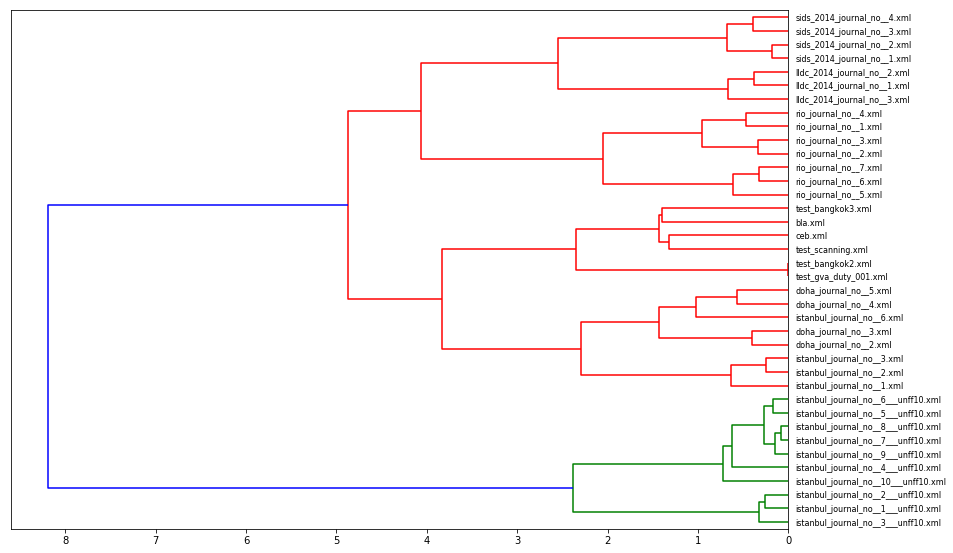

In [28]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sims, 'ward')
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.9, top=1.9, wspace=-1.6, hspace=1.8)
# Display this result as a horizontal dendrogram
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation='left')